In [3]:
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt

In [139]:
#This is fuction for scrapping
url = "https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31"
url_get = requests.get(url)
soup = BeautifulSoup(url_get.content,"html.parser")

# soup

In [140]:
#Find the key to get the information
table = soup.find("div", { "class" : "lister-list" })
# step1

In [141]:
row = table.find_all("div", { "class" : "lister-item mode-advanced" })
# row

In [136]:
test = row[1].find("span", {"name" : "nv" })
test

<span data-value="113149" name="nv">113,149</span>

In [144]:
tmp = [] #initiating a tuple

for i in range(0, len(row)):
    title = row[i].find("h3", { "class" : "lister-item-header" }).find('a').text.strip()
    rating = row[i].find("div", { "inline-block ratings-imdb-rating" }).find('strong').text.strip()
    if (row[i].find("span", { "metascore favorable" }) is None):
        metascore = '0'
    else:
        metascore = row[i].find("span", { "metascore favorable" }).text.strip()
    votes = row[i].find("span", {"name" : "nv" }).text.strip()
    
    
    tmp.append((title, rating, metascore, votes)) #append the needed information 
    
tmp

[('Sex Education', '8.3', '0', '99,477'),
 ('1917', '8.5', '78', '113,149'),
 ('The Witcher', '8.4', '0', '204,006'),
 ('Gisaengchung', '8.6', '96', '175,968'),
 ('Once Upon a Time ...in Hollywood', '7.8', '83', '356,171'),
 ('Joker', '8.6', '0', '640,099'),
 ('The Gentlemen', '8.1', '0', '15,913'),
 ('Jojo Rabbit', '8.0', '0', '66,226'),
 ('Little Women', '8.1', '91', '37,823'),
 ('The Mandalorian', '8.8', '0', '125,645'),
 ('Knives Out', '8.0', '82', '134,976'),
 ('Star Wars: Episode IX - The Rise of Skywalker', '6.9', '0', '243,525'),
 ('The Irishman', '8.0', '94', '218,617'),
 ('Terminator: Dark Fate', '6.3', '0', '80,252'),
 ('Marriage Story', '8.1', '93', '144,802'),
 ('Bombshell', '6.8', '64', '22,528'),
 ('Uncut Gems', '8.0', '90', '33,022'),
 ('The Lighthouse', '7.8', '83', '58,640'),
 ('Doctor Sleep', '7.5', '0', '58,818'),
 ('The Last Full Measure', '6.3', '0', '1,108'),
 ('Midsommar', '7.2', '72', '107,758'),
 ('Color Out of Space', '6.3', '70', '3,326'),
 ('Just Mercy', '7

In [155]:
df = pd.DataFrame(tmp, columns = ('judul' , 'imdb_rating' , 'metascore', 'votes'))
df['votes'] = df['votes'].str.replace(",", "")
df.head()

,judul,imdb_rating,metascore,votes
0,Sex Education,8.3,0,99477
1,1917,8.5,78,113149
2,The Witcher,8.4,0,204006
3,Gisaengchung,8.6,96,175968
4,Once Upon a Time ...in Hollywood,7.8,83,356171


In [159]:
df['imdb_rating'] = df['imdb_rating'].astype('float')
df['metascore'] = df['metascore'].astype('float')
df['votes'] = df['votes'].astype('int')
df.dtypes

judul           object
imdb_rating    float64
metascore      float64
votes            int32
dtype: object

<Figure size 1500x600 with 0 Axes>

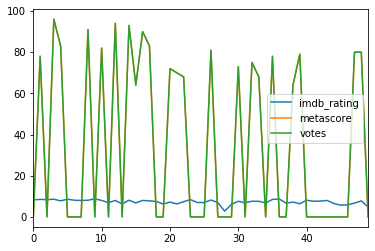

In [160]:
#This part for rendering matplotlib
fig = plt.figure(figsize=(5,2),dpi=300)
df.plot()